In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Objective:

##### Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

## Dataset Description:

RowNumber—corresponds to the record (row) number and has no effect on the output.

CustomerId—contains random values and has no effect on customer leaving the bank.

Surname—the surname of a customer has no impact on their decision to leave the bank.

CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography—a customer’s location can affect their decision to leave the bank.

Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts—refers to the number of products that a customer has purchased through the bank.

HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

IsActiveMember—active customers are less likely to leave the bank.

EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited—whether or not the customer left the bank.

In [196]:
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [198]:
df.shape

(10000, 14)

In [199]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [200]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [201]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [202]:
df.shape

(10000, 11)

In [203]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [204]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_col = df.dtypes[df.dtypes==np.object]
object_col = object_col.index.to_list()

In [205]:
object_col

['Geography', 'Gender']

In [206]:
for col in object_col:
    df[col] = le.fit_transform(df[col])

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [208]:
df = df.astype('float')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  float64
 2   Gender           10000 non-null  float64
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  float64
dtypes: float64(11)
memory usage: 859.5 KB


In [210]:
feature_col = [x for x in df.columns if x!='Exited']

In [211]:
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [212]:
df_org =df.copy()
corr = df.corr()
corr

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [213]:
for x in range(corr.shape[0]):
    corr.iloc[x,x] = 0.0
corr

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,0.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,0.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,0.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,0.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,0.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,0.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,0.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,0.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,0.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,0.000000,0.012097


In [214]:
corr.abs().idxmax()

CreditScore                Exited
Geography                 Balance
Gender                     Exited
Age                        Exited
Tenure             IsActiveMember
Balance             NumOfProducts
NumOfProducts             Balance
HasCrCard                  Tenure
IsActiveMember             Exited
EstimatedSalary     NumOfProducts
Exited                        Age
dtype: object

In [215]:
skew_col = df.skew().sort_values(ascending=False)
if 'Exited' in skew_col:
    skew_col.drop('Exited',inplace=True)

In [216]:
skew_col = skew_col.loc[skew_col>0.75]
skew_col

Age    1.01132
dtype: float64

In [217]:
for col in skew_col.index.to_list():
    df[col] = np.log1p(df[col])

In [218]:
skew_col = df.skew().sort_values(ascending=False)
skew_col

Exited             1.471611
NumOfProducts      0.745568
Geography          0.500916
Age                0.203360
Tenure             0.010991
EstimatedSalary    0.002085
IsActiveMember    -0.060437
CreditScore       -0.071607
Balance           -0.141109
Gender            -0.183596
HasCrCard         -0.901812
dtype: float64

<AxesSubplot:>

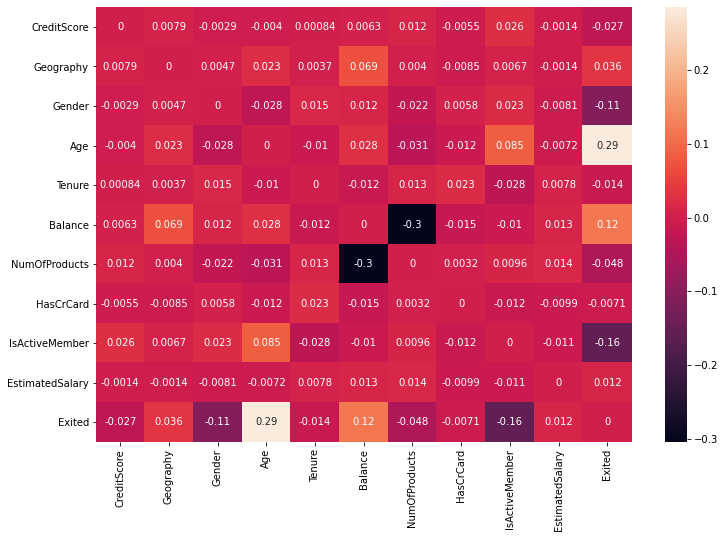

In [219]:
ax = plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

In [220]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[feature_col] = ss.fit_transform(df[feature_col])

## Summary of EDA:

After loading dataset i checked for null values but their was no missing in any column.

Then i checked skewness and applied log1p transform to make it like normal disturbution.

Checked Correlation but didn't tooked any action beacuse dataset donot have alot of features to drop them for elimation of correlation.

Droped Unnecessary columns from dataset.

As we know its not good idea to cluster dataset without scaling data, So before applying clustering technique i scaleed data.

## Different Models Trained Using Different Custering Algorithms

In [222]:
from sklearn.cluster import KMeans

km_list = list()

for i in range(1,15):
    km = KMeans(n_clusters=i,random_state=42)
    km = km.fit(df[feature_col])
    
    km_list.append(pd.Series({'clusters':i,'inertia':km.inertia_,'model':km}))

[Text(0.5, 0, 'clusters'), Text(0, 0.5, 'inertia')]

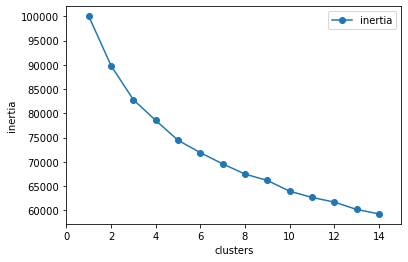

In [223]:
plot_df = pd.concat(km_list,axis=1).T[['clusters','inertia']].set_index('clusters')

ax = plot_df.plot(marker='o',ls='-')
ax.set_xticks(range(0,15,2))
ax.set_xlim(0,15)
ax.set(xlabel='clusters',ylabel='inertia')

In [224]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,random_state=42)
km = km.fit(df[feature_col])

df['kmeans'] = km.predict(df[feature_col])

In [225]:
df.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,kmeans
0,-0.326221,-0.901886,-1.095988,0.423222,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.0,0
1,-0.440036,1.515067,-1.095988,0.329713,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0.0,1
2,-1.536794,-0.901886,-1.095988,0.423222,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.0,0
3,0.501521,-0.901886,-1.095988,0.135823,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0.0,0


In [230]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [227]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.model_selection import StratifiedShuffleSplit

In [234]:
sss = StratifiedShuffleSplit(n_splits=5,random_state=42)

def get_avg_roc(estimator,X,y):
    roc_auc_list = []
    for train_idx,test_idx in sss.split(X,y):
        X_train,X_test = X.iloc[train_idx],X.iloc[test_idx]
        y_train,y_test = y.iloc[train_idx],y.iloc[test_idx]
        estimator.fit(X_train,y_train)
        y_pred = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:,1]
        roc_auc_list.append(roc_auc_score(y_test,y_scored))
    return np.mean(roc_auc_list)

estimator = RandomForestClassifier()
roc_auc = get_avg_roc(estimator,X,y)
print("Using kmeans cluster as input to random forest, roc-auc is \"{0}\"".format(roc_auc))

Using kmeans cluster as input to random forest, roc-auc is "0.8476814218149572"


In [235]:
from sklearn.cluster import AgglomerativeClustering

X2 = df[feature_col]
y = df['Exited']

In [243]:
ag = AgglomerativeClustering(n_clusters=2,linkage='ward',compute_full_tree=True)
ag = ag.fit(X2)
X2['agglo'] = ag.fit_predict(X2)

<ipython-input-243-4329a8be967b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['agglo'] = ag.fit_predict(X2)


In [244]:
sss = StratifiedShuffleSplit(n_splits=5,random_state=42)

def get_avg_roc(estimator,X,y):
    roc_auc_list = []
    for train_idx,test_idx in sss.split(X,y):
        X_train,X_test = X.iloc[train_idx],X.iloc[test_idx]
        y_train,y_test = y.iloc[train_idx],y.iloc[test_idx]
        estimator.fit(X_train,y_train)
        y_pred = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:,1]
        roc_auc_list.append(roc_auc_score(y_test,y_scored))
    return np.mean(roc_auc_list)

estimator = RandomForestClassifier()
roc_auc = get_avg_roc(estimator,X2,y)
print("Using Agglomerative cluster as input to random forest, roc-auc is \"{0}\"".format(roc_auc))

Using Agglomerative cluster as input to random forest, roc-auc is "0.8460685781850428"


In [245]:
from sklearn.cluster import DBSCAN

X3 = df[feature_col]
y = df['Exited']

In [263]:
db = DBSCAN(eps=0.5,min_samples=3)
db = db.fit(X3)
X3['dbscan'] = db.fit_predict(X3)

<ipython-input-263-caba3fd15feb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3['dbscan'] = db.fit_predict(X3)


In [264]:
sss = StratifiedShuffleSplit(n_splits=5,random_state=42)

def get_avg_roc(estimator,X,y):
    roc_auc_list = []
    for train_idx,test_idx in sss.split(X,y):
        X_train,X_test = X.iloc[train_idx],X.iloc[test_idx]
        y_train,y_test = y.iloc[train_idx],y.iloc[test_idx]
        estimator.fit(X_train,y_train)
        y_pred = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:,1]
        roc_auc_list.append(roc_auc_score(y_test,y_scored))
    return np.mean(roc_auc_list)

estimator = RandomForestClassifier()
roc_auc = get_avg_roc(estimator,X3,y)
print("Using DBSCAN cluster as input to random forest, roc-auc is \"{0}\"".format(roc_auc))

Using DBSCAN cluster as input to random forest, roc-auc is "0.8497339639373337"


## Summary and Explination of Unsupervised Learning Models

I have applied different clustering techniques on this dataset and found that DBSCAN performs little bit better than 
other clustering technique. And during hyperparameter tunning I found that DBSCAN have high accuraccy for value of number 
of sample equal to 3 instead of default value of 5.

## Summery

Actually in this dataset we have feature of exited or not but that was only for our testing purpose, we want to see how much
our clustering technique combine with supervied learning is showing us accurate result. So as key note we can cluster our
clients into churn and will not-churn, So that you make policies accordingly.

## Suggestion

Although we donot have complex data but still you can apply PCA technique to come up with new feature and see is their any
change in accuracy of model etc.